# **STUDENT PERFORMANCE PREDICTION**

**Presentation Drive Link**

https://drive.google.com/file/d/19mJZGe_M5pELSjtJCgNDT5brwsX8s7gR/view?usp=drivesdk

**Importing** **the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/student-marks.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [ ]:
df.shape

(395, 33)

In [ ]:
col_names = df.columns#viewing column names

col_names

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**Identifying the null values**

In [ ]:
df.isnull().sum() # it seems there is no empty cell.

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

**Identifying whether the dataset has any missing values**

In [ ]:

# Load the dataset
df = pd.read_csv("/content/student-marks.csv")  # Replace with the actual file path

# Check for missing values
missing_values = df.isna().sum()

# Display the result
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the dataset:")
    print(missing_values)

No missing values found in the dataset.


In [ ]:
df.describe()#it helps us to view the statistical properties of numerical variables. It excludes character variables.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**visualization of data distribution for a numerical values data**

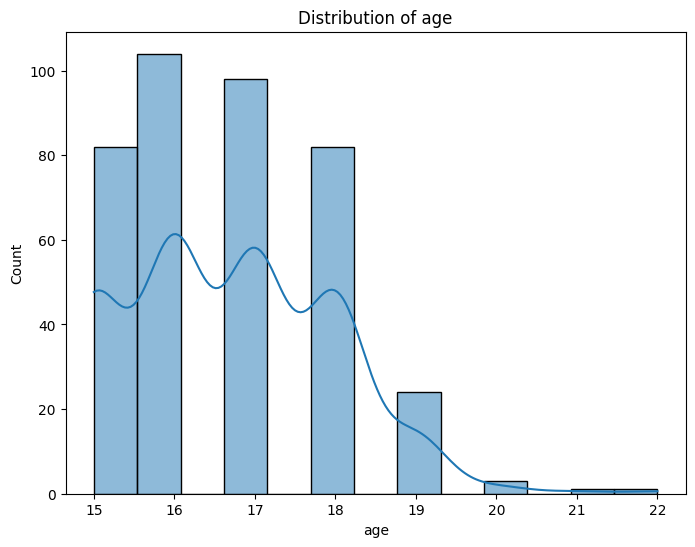

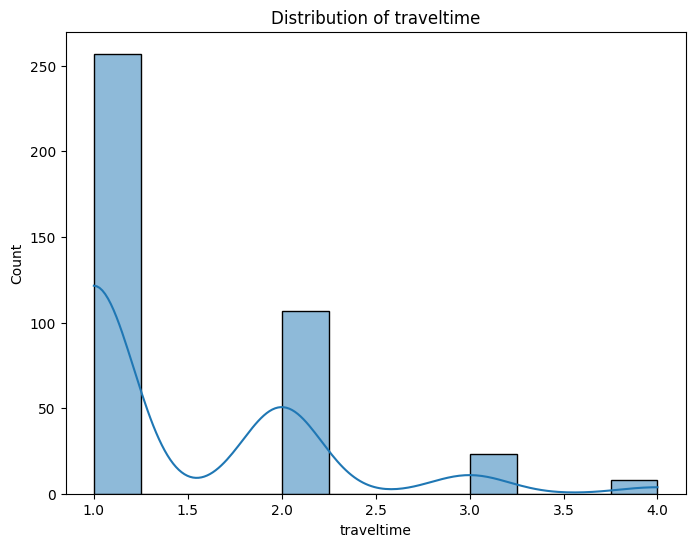

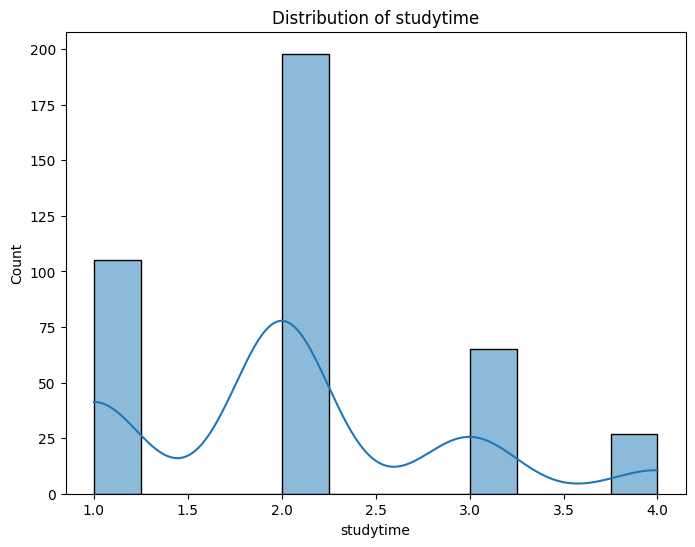

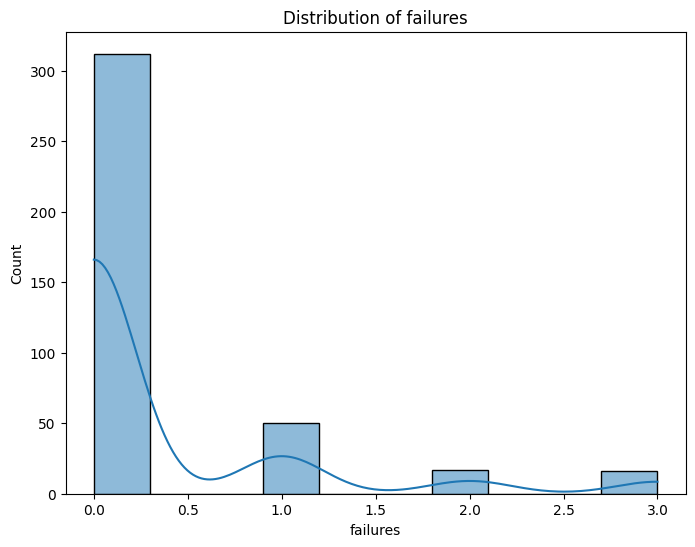

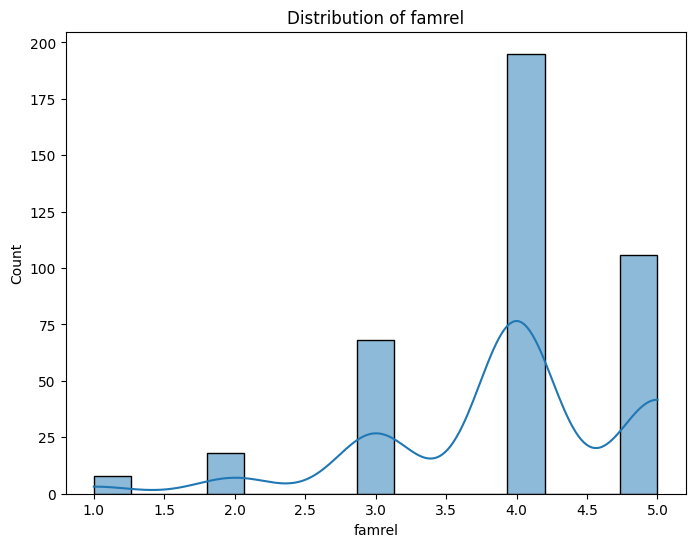

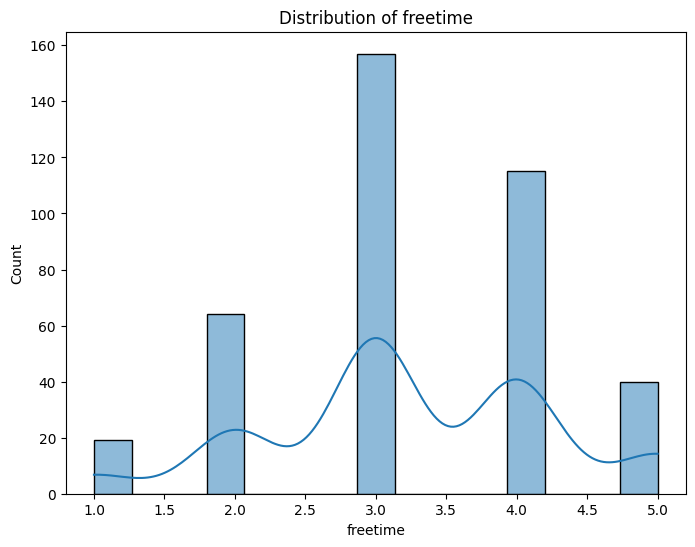

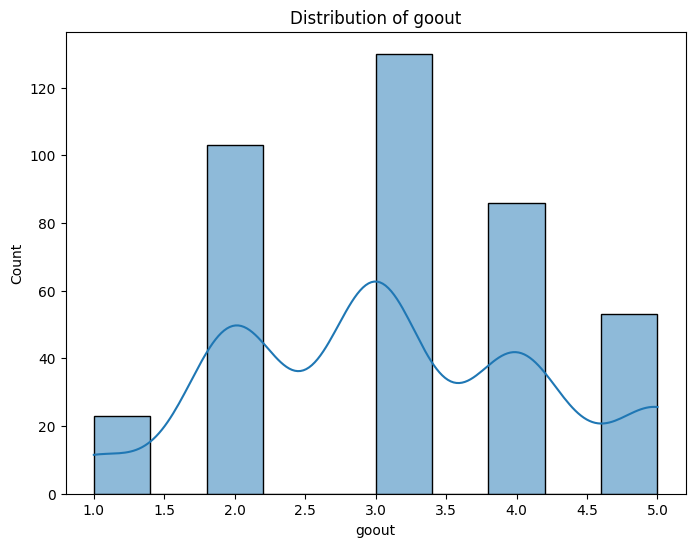

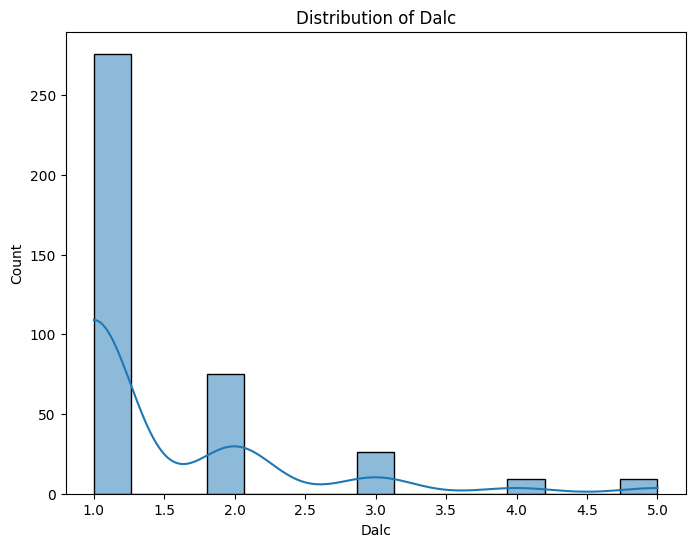

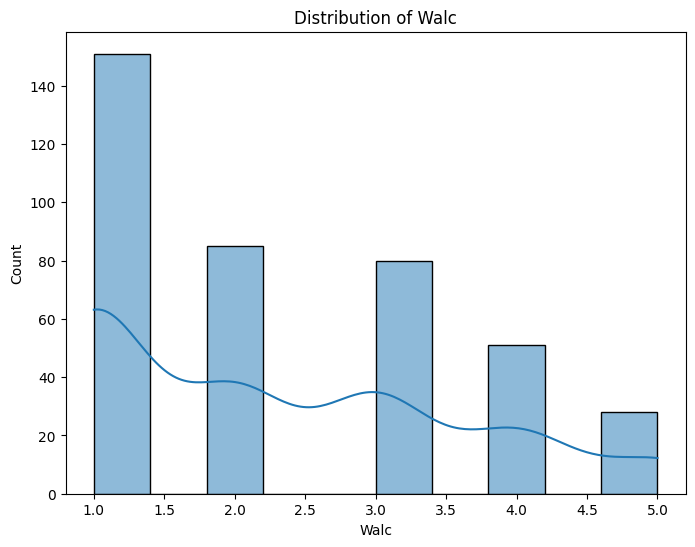

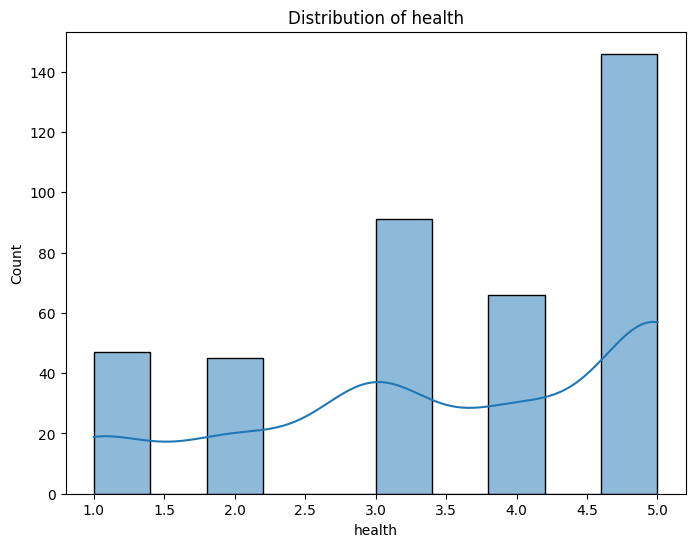

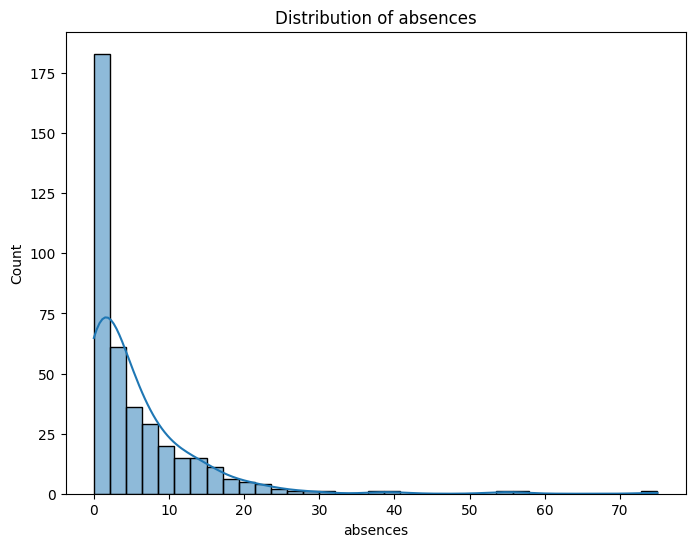

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for visualization
numerical_columns = ['age','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']

# Create histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde= True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Identifying the outliers using Zscore**

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = zscore(df[numerical_columns])

# Set a threshold for identifying outliers
z_threshold = 3


# Identify outliers using z-scores
outliers = (z_scores > z_threshold) | (z_scores < -z_threshold)

# Display indices of rows with outliers
outlier_indices = df.index[outliers.any(axis=1)]
print ("z_score outliers are:",outlier_indices)

z_score outliers are: Int64Index([  2,  18,  25,  29,  61,  66,  74,  78, 100, 108, 127, 134, 144,
            146, 149, 150, 153, 157, 164, 173, 183, 184, 206, 207, 223, 228,
            236, 247, 276, 280, 299, 307, 315, 327, 349, 350, 357, 375, 389,
            392],
           dtype='int64')


In [ ]:
# Remove outliers from the DataFrame
df_cleaned = df.drop(outlier_indices)

# Display the cleaned DataFrame
print("Shape of original DataFrame:", df.shape)
print("Shape of DataFrame after removing outliers:", df_cleaned.shape)


Shape of original DataFrame: (395, 33)
Shape of DataFrame after removing outliers: (355, 33)


**Creating a Heatmap, A heatmap is a graphical representation of data where values in a matrix are represented as colors. it is used to visualize the correlation matrix**

<ipython-input-14-e450a71b099f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df_cleaned.corr()#This line calculates the correlation matrix for df


<Axes: >

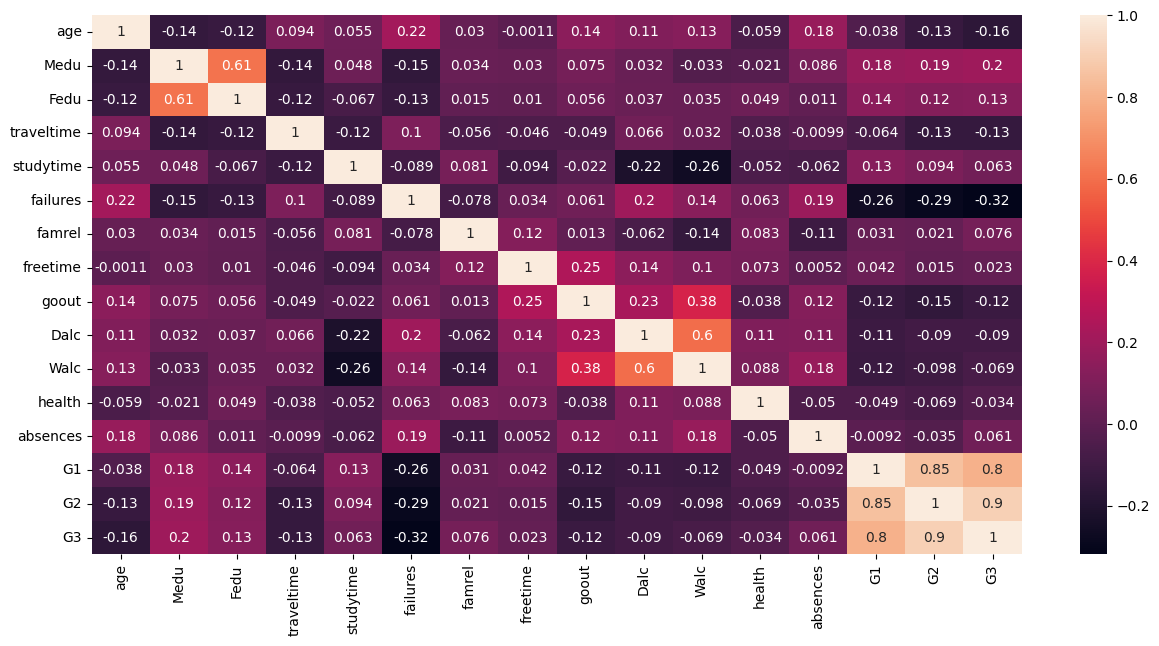

In [ ]:
cor_mat=df_cleaned.corr()#This line calculates the correlation matrix for df
fig = plt.figure(figsize=(15,7))#This line creates a new figure for our plot the figure will have a width of 15 units and a height of 7 units.
sns.heatmap(cor_mat,annot=True)#cor_mat DataFrame will have rows and columns annot true parameter adds annotations (the actual correlation values) to the cells of the heatmap, making it easier to interpret the heatmap

**Bar Diagram showing age of students**

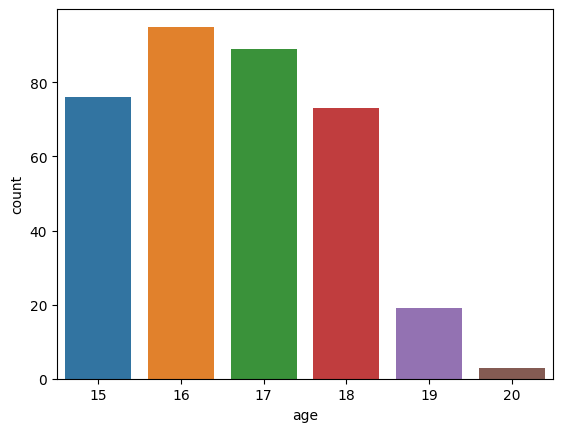

In [ ]:
sns.countplot(x='age', data=df_cleaned)
plt.show()

**Framing questions and answering that are related to the objective**

Average age of students: 16.64 years


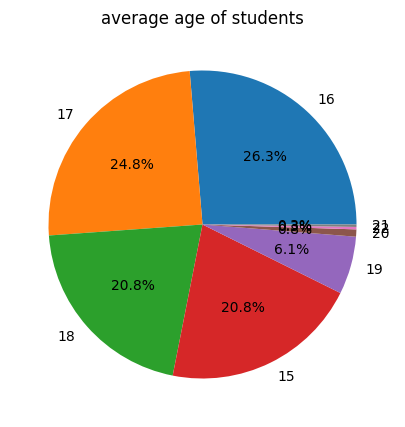

In [ ]:
# Question 1: What is the average age of students in the dataset?
average_age = df_cleaned['age'].mean()
print(f"Average age of students: {average_age:.2f} years")
plt.figure(figsize=(8, 5))
df['age'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("average age of students")
plt.ylabel('')
plt.show()

In [ ]:

# Question 2: How many students come from each school?
school_counts = df_cleaned['school'].value_counts()
print("Number of students from each school:")
print(school_counts)

Number of students from each school:
GP    315
MS     40
Name: school, dtype: int64


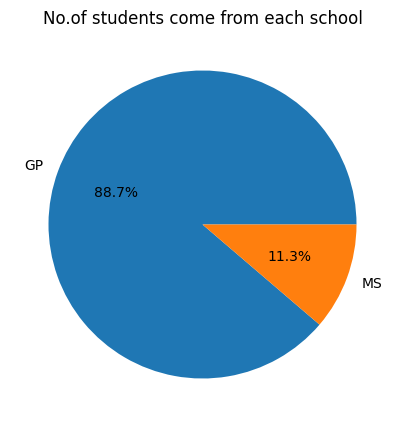

In [ ]:
plt.figure(figsize=(8, 5))
df_cleaned['school'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("No.of students come from each school")
plt.ylabel('')
plt.show()

Most common number of failures: 0


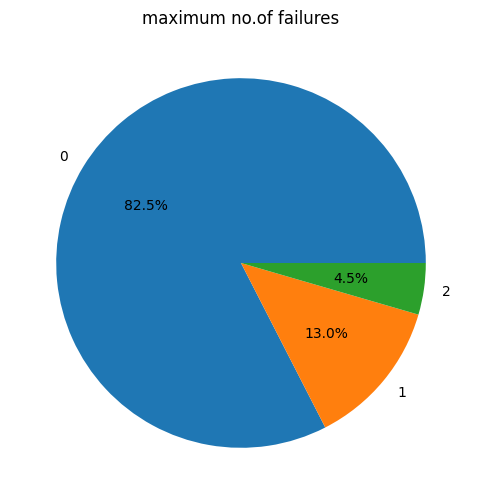

In [ ]:
# Question 3: What is the most common number of failures among students?
most_common_failures = df_cleaned['failures'].mode().values[0]
print(f"Most common number of failures: {most_common_failures}")
plt.figure(figsize=(8, 6))
df_cleaned['failures'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("maximum no.of failures")
plt.ylabel('')
plt.show()

Number of students with travel time > 1: 120


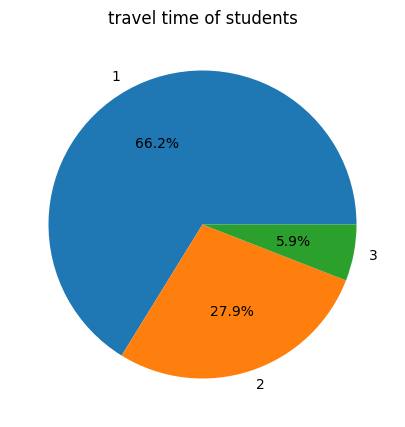

In [ ]:
# Question 2: How many students have a travel time greater than 15 minutes?
travel_time_greater_than_1 = (df_cleaned['traveltime'] > 1).sum()
print(f"Number of students with travel time > 1: {travel_time_greater_than_1}")
plt.figure(figsize=(8, 5))
df_cleaned['traveltime'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("travel time of students")
plt.ylabel('')
plt.show()

# **Multi Collinearity**

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
X = pd.get_dummies(df_cleaned, drop_first=True)

# Check if "G3" is in the columns of the new DataFrame
if "G3" in X.columns:
    # Drop the "G3" column
    X = X.drop("G3", axis=1)
X.columns

Index(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df_cleaned):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df_cleaned.columns
    vif["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(df_cleaned.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

,variables,VIF
0,age,106.597981
1,Medu,21.869475
2,Fedu,14.001793
3,traveltime,8.054680
4,studytime,10.086381
5,failures,1.801066
6,famrel,30.463615
7,freetime,14.402797
8,goout,13.514931
9,Dalc,9.180799


In [ ]:
columns_to_drop = ['age']
df_cleaned= df_cleaned.drop(columns=columns_to_drop)


In [ ]:
calc_vif(X)

,variables,VIF
0,Medu,21.869064
1,Fedu,13.892826
2,traveltime,7.754369
3,studytime,9.595059
4,failures,1.765801
5,famrel,27.630291
6,freetime,14.289834
7,goout,13.299594
8,Dalc,9.152380
9,Walc,9.243292


**Allocation of dummy variables**

In [ ]:
df_cleaned['school'].replace(['GP','MS'],[0,1],inplace=True)
df_cleaned['sex'].replace(['F','M'],[0,1],inplace=True)
df_cleaned['address'].replace(['U','R'],[0,1],inplace=True)
df_cleaned['famsize'].replace(['GT3','LE3'],[0,1],inplace=True)
df_cleaned['Pstatus'].replace(['A','T'],[0,1],inplace=True)
df_cleaned['schoolsup'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['famsup'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['paid'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['activities'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['nursery'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['higher'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['internet'].replace(['no','yes'],[0,1],inplace=True)
df_cleaned['romantic'].replace(['no','yes'],[0,1],inplace=True)

In [ ]:
#Create a mapping for job levels
job_mapping={'teacher':1,'health':1,'services':1,'at_home':0,'other':0}
df_cleaned['Mjob_level']=df_cleaned['Mjob'].map(job_mapping)
df_cleaned['Fjob_level']=df_cleaned['Fjob'].map(job_mapping)


In [ ]:
df_cleaned=pd.get_dummies(df_cleaned, drop_first=True)
print(df_cleaned)

     school  sex  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0         0    0        0        0        0     4     4           2   
1         0    0        0        0        1     1     1           1   
3         0    0        0        0        1     4     2           1   
4         0    0        0        0        1     3     3           1   
5         0    1        0        1        1     4     3           1   
..      ...  ...      ...      ...      ...   ...   ...         ...   
388       1    0        0        1        1     3     1           1   
390       1    1        0        1        0     2     2           1   
391       1    1        0        1        1     3     1           2   
393       1    1        1        1        1     3     2           3   
394       1    1        0        1        1     1     1           1   

     studytime  failures  ...  Mjob_teacher  Fjob_health  Fjob_other  \
0            2         0  ...             0            0           0   
1  

In [ ]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
  dummies = pd.get_dummies(df_cleaned[col],prefix=col)
  df_cleaned= pd.concat([df_cleaned,dummies], axis=1)
  df_cleaned= df_cleaned.drop(columns=[col])
print(df_cleaned)

     school  sex  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0         0    0        0        0        0     4     4           2   
1         0    0        0        0        1     1     1           1   
3         0    0        0        0        1     4     2           1   
4         0    0        0        0        1     3     3           1   
5         0    1        0        1        1     4     3           1   
..      ...  ...      ...      ...      ...   ...   ...         ...   
388       1    0        0        1        1     3     1           1   
390       1    1        0        1        0     2     2           1   
391       1    1        0        1        1     3     1           2   
393       1    1        1        1        1     3     2           3   
394       1    1        0        1        1     1     1           1   

     studytime  failures  ...  Mjob_teacher  Fjob_health  Fjob_other  \
0            2         0  ...             0            0           0   
1  

In [ ]:
df_cleaned.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_level', 'Fjob_level', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other'],
      dtype='object')

In [ ]:
df_cleaned.head

<bound method NDFrame.head of      school  sex  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0         0    0        0        0        0     4     4           2   
1         0    0        0        0        1     1     1           1   
3         0    0        0        0        1     4     2           1   
4         0    0        0        0        1     3     3           1   
5         0    1        0        1        1     4     3           1   
..      ...  ...      ...      ...      ...   ...   ...         ...   
388       1    0        0        1        1     3     1           1   
390       1    1        0        1        0     2     2           1   
391       1    1        0        1        1     3     1           2   
393       1    1        1        1        1     3     2           3   
394       1    1        0        1        1     1     1           1   

     studytime  failures  ...  Mjob_teacher  Fjob_health  Fjob_other  \
0            2         0  ...             0  

In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# Replace df with your actual DataFrame variable if it's different

# List of predictor variables
X_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
             'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
             'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
             'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
              'Mjob_level', 'Fjob_level', 'Mjob_health', 'Mjob_other',
             'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
             'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
             'reason_reputation', 'guardian_mother', 'guardian_other']

# X: Predictor variables
X = df_cleaned[X_columns]

# y: Target variable
y = df_cleaned['G3']


# **1.Linear Regression**



In [ ]:
%matplotlib inline

**Data visualization
bulding correlation matrix**

<Axes: >

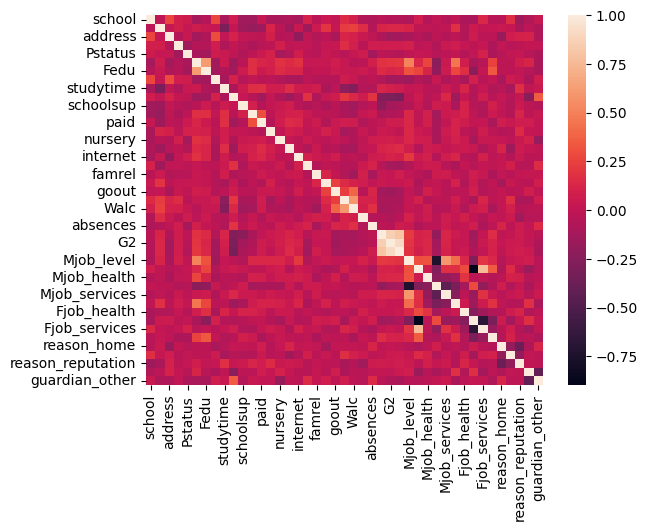

In [ ]:
sns.heatmap(df_cleaned.corr())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
#Splitting data into Training and Testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.shape , X_test.shape

((284, 42), (71, 42))

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
predictions


array([ 7.52395176, 12.72715107, 19.01708485, 10.34135236,  9.96413137,
       12.35466021, 13.31958803,  9.0751303 , 15.90867321,  8.55407271,
        5.5974721 , 11.52047873,  8.35054088,  6.46274322, -2.60409565,
        3.9150715 ,  6.41669576,  8.57492114,  7.5140908 ,  6.91373595,
       11.56818411, 11.61945131,  9.48597785, 16.38683541,  7.78861959,
       13.77853836,  7.22271335, 12.34253293, 11.94318465, 11.11691813,
       13.54233648,  6.85405532, 13.88323605,  8.87593898, 12.83656959,
        6.86694429,  8.33021865,  5.33559918,  7.08818179, 14.59215257,
        7.87169189, 14.90991765, 14.09954481,  9.96997869,  4.06460022,
       13.51724979, 16.26032021, 11.74877607,  5.8325705 , 10.44963003,
       10.98891081,  7.41305621,  9.72541886,  6.43457446,  9.03215992,
        9.91277776,  8.85897661,  9.53248706,  9.24231615,  8.96653904,
       17.61714438, 12.24770578,  7.79669083,  6.47972779, 11.67870399,
        5.21595738,  6.36919826,  5.08416728, 11.15966441, 13.52

In [ ]:
# Calculate Mean Squared Error and R-squared
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean absolute Error:', mae)
print('R-squared:', r2)


Mean absolute Error: 1.3102689375317635
R-squared: 0.7158170558140711


# **2.Random forest Regressor**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = rf_regressor.predict(X_test_scaled)
print(predictions)

# Calculate Mean Squared Error and R-squared
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean absolute Error:', mae)
print('R-squared:', r2)



[ 9.47 11.29 18.04  8.69 10.76 12.04 14.05  9.22 15.09  9.1   1.81 11.32
  9.4   2.25  0.06  7.21  7.2   9.88  9.15  2.41 12.14 12.04 10.43 16.04
  7.69 13.64  4.11 13.32 11.25 10.12 12.18  2.73 14.09 10.01 12.61  3.87
  9.03  7.71  6.23 13.57  5.32 13.41 13.25 10.86  5.74 13.39 15.8  11.75
  7.41 10.41 12.    7.55  9.95  7.56 10.   10.62  8.92 11.19 10.03  9.85
 15.97 12.68  7.04  8.39 11.31  5.72  5.85  5.93 10.81 12.71 10.67]
Mean absolute Error: 0.9718309859154928
R-squared: 0.7758665603977771


# **3.Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor  # for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,mean_absolute_error


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
reg.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = reg.predict(X_test)
# Calculate Mean Squared Error and R-squared
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean absolute Error:', mae)
print('R-squared:', r2)


Mean absolute Error: 1.0435175864989616
R-squared: 0.774258657071633


# **4.Support Vector Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
model = SVR(kernel='poly')  # You can also use 'poly' or 'rbf' kernels

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and r2_score to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute Error: {mae}")
r2 = r2_score(y_test,y_pred)
print(f"R-squared:{r2}")




Mean absolute Error: 1.20965936644691
R-squared:0.6639816415681596


# **5.XG BOOST regressor**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_reg = xgb.XGBRegressor(objective='reg:absoluteerror',
                         colsample_bytree=0.3,
                         learning_rate=0.1,
                         max_depth=5,
                         alpha=10,
                         n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:", mae)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean absolute Error: 1.0669373727180589
R-squared: 0.7757343457161885


## **6.KNN Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean absolute Error: 1.2591549295774649
R-squared: 0.7529224919567123


# **7.Decision Tree Regressor**





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = DecisionTreeRegressor()
data.fit(X_train, y_train)

y_pred = data.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean absolute Error: 1.1126760563380282
R-squared: 0.5607926294238081


# **8.Artificial Neural Network**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='linear',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 137.4761 - val_loss: 117.2941
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 127.5153 - val_loss: 115.0147
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 119.8389 - val_loss: 112.6766
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 112.7078 - val_loss: 109.4344
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 106.1687 - val_loss: 105.4499
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 98.5207 - val_loss: 100.4176
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 91.1576 - val_loss: 93.1650
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 83.1277 - val_loss: 86.7635
Epoch 9/100
9/9 [==============================] - 0s 15ms/step - loss: 74.5287 - val_loss: 77.0257
Epoch 10/100
9/9 [==============================] - 0s 12ms/step - loss: 65.2357 - val_loss

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2):{r2}")

3/3 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 1.356456652493544
Mean Squared Error (MSE): 4.006219287849888
R-squared (R2):0.7046599673873752


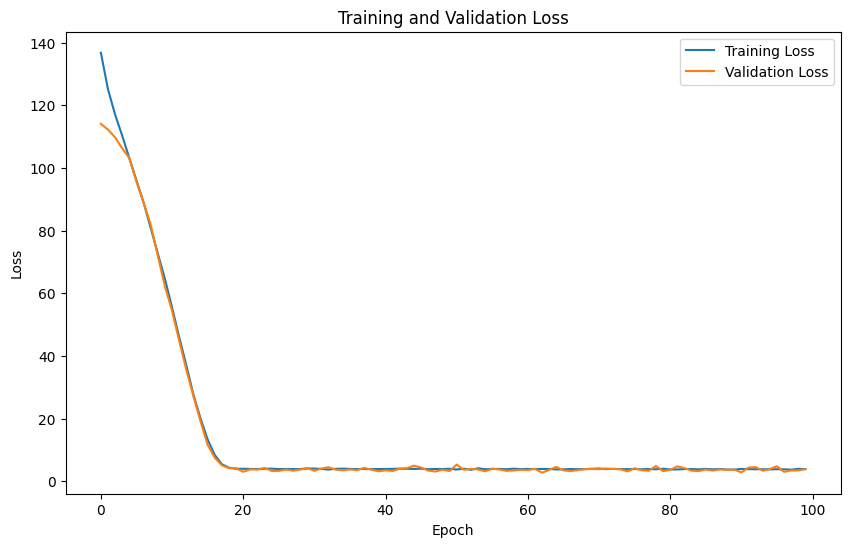

In [ ]:
import matplotlib.pyplot as plt
# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()